# Tomografía
- Martín Rodriguez Turco
- Ian Díaz
- Agustín Galdema

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from skimage.data import shepp_logan_phantom
from skimage.transform import radon, rescale, iradon

In [109]:
def generate_slice(cant_slices, m, seed=None):
  """ Genera imagenes con contenidos de diferentes tamaños y densidades """
  if seed:
    np.random.seed(seed);
  canvas = np.zeros((m,m))
  for i in range(cant_slices):
    x = np.random.randint(m)
    y = np.random.randint(m)
    w = m
    h = m
    intensity = np.random.randint(0,255)
    radius = min(x,y, w-x, h-y)
    canvas = cv.circle(canvas,(x,y), radius, intensity, -1)
  return canvas

def make_sinogram(image, theta=None):
  if theta is None:
    theta = np.linspace(0., 180., max(image.shape), endpoint=False)
  sinogram = radon(image, theta=theta, circle=False) # Calculamos los sinogramas en los ángulos pedidos
  return theta, sinogram

def reconstruct_from_sinogram(theta, sinogram,  filter_name='ramp'):
  reconstruction_fbp = iradon(sinogram, theta=theta, filter_name=filter_name)
  return reconstruction_fbp


def plot_sinogram_and_reconstruct(image, filter_name, theta=None):
  theta, sinogram = make_sinogram(image, theta) # Construimos los sinograms para diferentes valores de theta
  reconstruction = reconstruct_from_sinogram(theta, sinogram, filter_name=filter_name) # reconstruimos con el filtro deseado

  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4.5))
  ax1.set_title("Original")
  ax1.imshow(image, cmap=plt.cm.Greys_r)
  dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]
  ax2.set_title("Radon transform\n(Sinogram)")
  ax2.set_xlabel("Projection angle (deg)")
  ax2.set_ylabel("Projection position (pixels)")
  ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
            extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
            aspect='auto')
  ax3.set_ylabel("Reconstruction")
  ax3.imshow(reconstruction, cmap=plt.cm.Greys_r)
    

## Generamos la imagen base

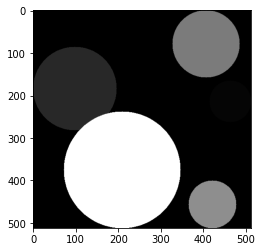

In [122]:
image = generate_slice(5, 512, 57)
plt.imshow(image, cmap='gray');

## Veamos los sinograms desde ángulos de 0 y 90 grados

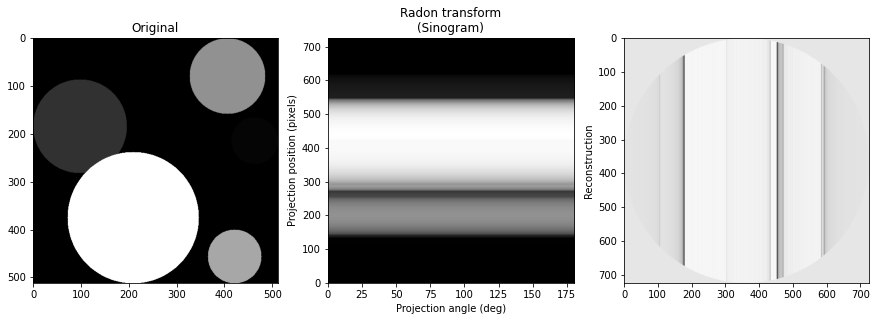

In [104]:
thetha = 0
plot_sinogram_and_reconstruct(image, 'hamming', theta=[0])

Con 90

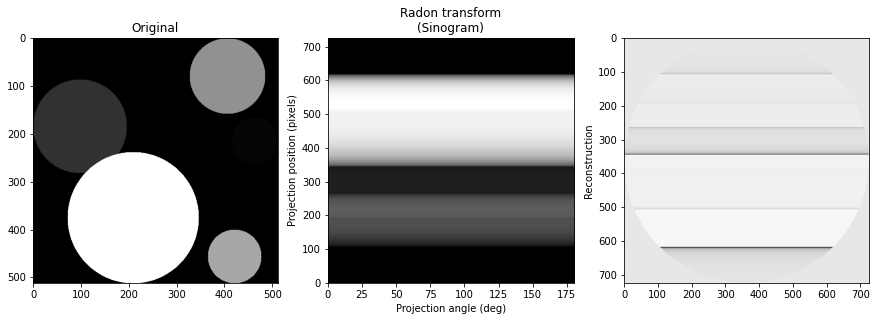

In [105]:
plot_sinogram_and_reconstruct(image, 'hamming', theta=[90])

Con solo 10 sinogramas

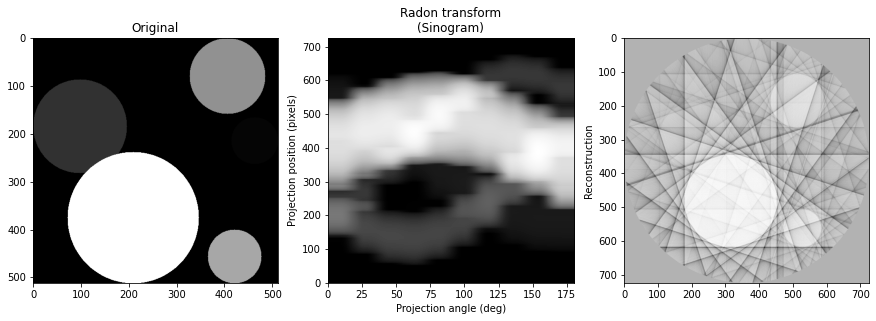

In [108]:
plot_sinogram_and_reconstruct(image, 'hamming', theta=np.linspace(0, 180, 10,endpoint=False))

Con 20

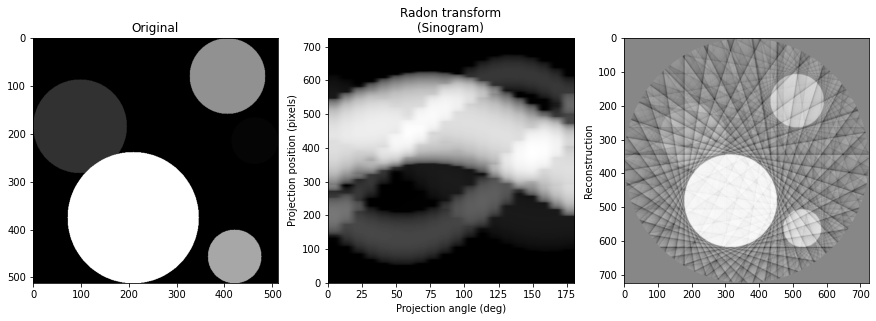

In [107]:
plot_sinogram_and_reconstruct(image, 'hamming', theta=np.linspace(0, 180, 20,endpoint=False))

Ahora vamos a realizar las transformaciones tomando tantas proyecciones como el tamañano de la imagen. Es decir, como en este caso tenemos una imagen de 512 por 512 entonces computaremos 512 proyecciones. 

## Usando ventana de Hamming * |w| para la reconstrucción 
De esta forma contrarestramos el efecto de acumulación de contenido de bajas frecuencias que se da durante la reconstrucción

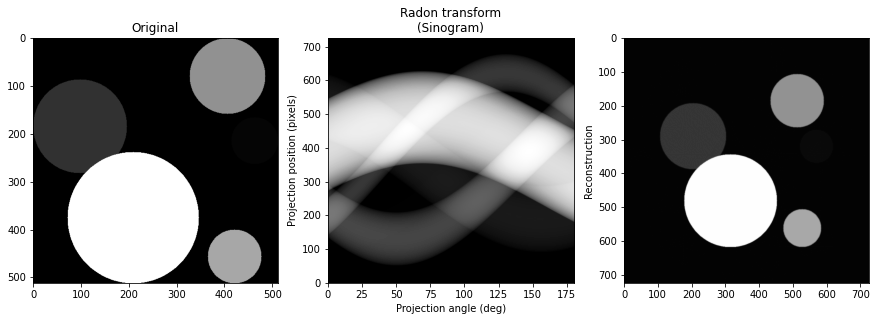

In [97]:
plot_sinogram_and_reconstruct(image, 'hamming')

## Filtro de reconstrucción Rampa |w|

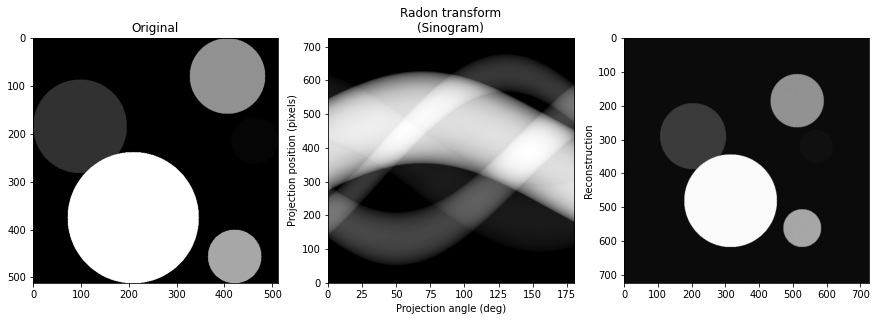

In [98]:
plot_sinogram_and_reconstruct(image, 'ramp')

## Si no utilizamos ningún tipo de función ponderadora entonces acumulamos mucho contenido de bajas frecuencias lo cual se traduce en una imagen blureada y por lo tanto no es de utilidad ya que al ser de gran aplicación en medicina, es necesario contar con imagenes detalladas

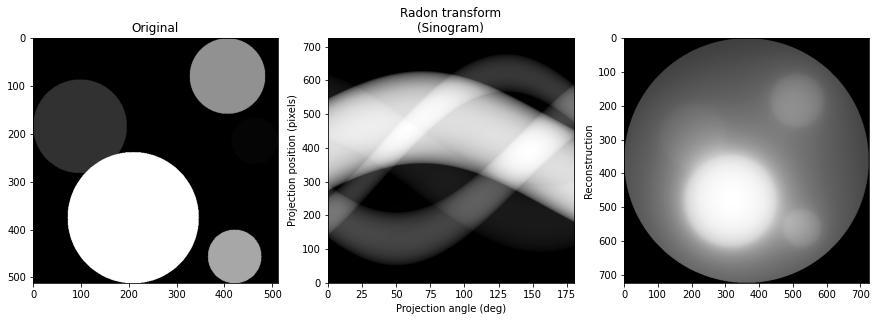

In [99]:
plot_sinogram_and_reconstruct(image, filter_name=None)